1. What is the fundamental idea behind ensemble techniques? How does
bagging differ from boosting in terms of approach and objective?
    - The fundamental idea of ensemble techniques is to combine multiple models to improve predictive accuracy and stability, a concept known as the "wisdom of crowds". Bagging creates models independently on random data subsets in parallel to reduce variance, while boosting creates models sequentially, with each new model focusing on the errors of the previous one to reduce bias.


2. Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
   - A single decision tree is prone to overfitting because it can grow to full depth and perfectly memorize the training data, including noise. The Random Forest Classifier reduces overfitting by using an ensemble of many individual decision trees and introducing two key sources of randomness: bootstrap aggregating (bagging) and feature randomness.
   - How Random Forest Reduces Overfitting
   - Ensemble Averaging/Voting: Each tree in the forest is trained on a different, random subset of the data and features. While individual trees might overfit their specific training subset (having high variance), their errors tend to be different and largely uncorrelated. The final prediction is a majority vote (for classification) or average (for regression) of all the individual tree predictions. This aggregation process smooths out the noise captured by individual trees, resulting in a more stable and generalized model that performs better on unseen data.
   - Bagging (Bootstrap Aggregating): Each tree is built using a random sample of the training data, drawn with replacement. This ensures that each tree is trained on a slightly different dataset, increasing the diversity of the trees.

3. What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
   - Stacking, or stacked generalization, is an ensemble learning technique that combines the predictions of multiple diverse models (base models) using a second-level model, known as a meta-model or blender. The meta-model learns how to optimally combine the predictions of the base models to produce a final, more accurate prediction.
        Differences from traditional Bagging/Boosting methods:
   - Model Diversity: Stacking typically uses heterogeneous base models (different algorithms like SVM, Decision Trees, Logistic Regression), while bagging and boosting usually employ homogeneous weak learners (e.g., multiple decision trees in Random Forests or Gradient Boosting).
   - Combination Strategy: Bagging combines predictions by averaging (for regression) or voting (for classification). Boosting sequentially builds models, with each new model focusing on correcting errors made by previous ones. Stacking, in contrast, trains a meta-model to learn the optimal way to combine the base model predictions, treating them as new features.
   - Goal: Bagging primarily aims to reduce variance, boosting aims to reduce bias, and stacking aims to improve overall predictive accuracy by leveraging the strengths of different model types.


4. What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
   - The Out-of-Bag (OOB) score is an internal validation metric in Random Forest that estimates model performance using the data samples not used in a tree's training. It is useful because it provides an unbiased estimate of accuracy without needing a separate validation set, saving data for training and helping prevent overfitting.
       Why is it useful?
   - Saves data: It allows you to use all of your training data for building the model, instead of holding some of it back for a separate validation set.
   - Internal validation: It provides an "internal" validation measure, meaning you get an estimate of the model's generalization ability directly from the training process.
   - Prevents overfitting: It helps to monitor and prevent overfitting, as it evaluates performance on unseen data points. For example, the OOB score can be used to tune parameters like the maximum depth of the trees.
   - How it helps evaluate the model without a validation set:
During training, each tree is built: Each decision tree is trained on a bootstrap sample of the data, leaving out some data points.
Predictions are made on OOB data: For each data point, a prediction is made using all the trees that were not trained on that specific point. These are the OOB predictions for that point.
   - Scores are averaged: After making predictions for all data points using their respective OOB trees, the OOB score is calculated by averaging the performance (e.g., accuracy or error) across all of the samples.
   - Final metric: This final average score is the OOB score, which acts as a reliable estimate of the model's performance on new, unseen data, and it is computed directly from the training process itself.


5. Compare AdaBoost and Gradient Boosting in terms of: ● How they handle errors from weak learners ● Weight adjustment mechanism ● Typical use cases.
   - AdaBoost and Gradient Boosting are both powerful ensemble learning techniques, but they differ in their approach to handling errors, adjusting weights, and their typical applications.
        1. How they handle errors from weak learners:
   -  AdaBoost: AdaBoost focuses on misclassified samples. It identifies errors by tracking which data points are incorrectly predicted by the current weak learner. In subsequent iterations, it assigns higher weights to these misclassified samples, forcing the next weak learner to pay more attention to them.
     - Gradient Boosting: Gradient Boosting handles errors by fitting subsequent weak learners to the residuals (the differences between the actual values and the predictions of the current ensemble model). It aims to minimize a loss function using gradient descent, where each new learner is trained to predict the negative gradient of the loss function with respect to the current ensemble's predictions.
       2. Weight adjustment mechanism:
   - AdaBoost: AdaBoost adjusts the weights of the training samples. Misclassified samples receive increased weights, while correctly classified samples receive decreased weights. This reweighting influences the training of the next weak learner. It also assigns a weight to each weak learner in the final ensemble based on its performance.
   - Gradient Boosting: Gradient Boosting does not directly adjust sample weights in the same way AdaBoost does. Instead, it builds new weak learners that directly model the residuals or the negative gradient of the loss function. The contribution of each new weak learner to the ensemble is scaled by a learning rate, which controls the step size in the direction of the negative gradient.
     3. Typical use cases:
AdaBoost: AdaBoost is primarily used for classification tasks, especially with simple weak learners like decision stumps (decision trees with a single split). It is known for its ability to handle noisy data and its resistance to overfitting, making it suitable for tasks like face detection, text categorization, and medical diagnosis.
   -  Gradient Boosting: Gradient Boosting is more versatile and can be used for both classification and regression tasks. It often employs deeper decision trees as weak learners and can handle complex problems with non-linear relationships. It is widely used in various applications, including predictive modeling in finance, healthcare, and e-commerce, where high accuracy is crucial. Popular implementations like XGBoost, LightGBM, and CatBoost are based on the gradient boosting framework.


6. Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
   - CatBoost, short for "Categorical Boosting," excels with categorical features due to its native and sophisticated handling mechanisms, eliminating the need for extensive manual preprocessing like one-hot encoding or label encoding. This built-in approach reduces the risk of data leakage and improves model performance and robustness.
       CatBoost's Handling of Categorical Variables:
   - Ordered Target Encoding: CatBoost employs a unique technique called "Ordered Target Encoding" to convert categorical features into numerical representations. Instead of using the entire dataset to calculate target statistics for each category (which can lead to target leakage), it leverages a permutation-driven approach.
    - For each data point, it considers only the data points appearing before it in a randomly permuted order to calculate the target statistics (e.g., mean target value) for its category. This prevents the model from "seeing" future information and thus avoids target leakage.
   - This process is repeated multiple times with different permutations, and the final numerical representation for a category is often an average of the statistics obtained from these permutations.


7. KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task: 1. Load the Wine dataset (sklearn.datasets.load_wine()). 2. Split data into 70% train and 30% test. 3. Train a KNN classifier (default K=5) without scaling and evaluate using: a. Accuracy b. Precision, Recall, F1-Score (print classification report) 4. Apply StandardScaler, retrain KNN, and compare metrics. 5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric (Euclidean, Manhattan).6.Train the optimized KNN and compare results with the unscaled/scaled versions.


In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np
# 1. Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target
# 2. Split data into 70% train and 30% test
# Using random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# --- 3. Train KNN classifier (K=5) without scaling and evaluate ---
print("--- KNN without Scaling (K=5) ---")
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)
# Evaluation
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)
print(f"Accuracy: {accuracy_unscaled:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_unscaled, target_names=wine.target_names))
# --- 4. Apply StandardScaler, retrain KNN, and compare metrics ---
print("\n--- KNN with StandardScaler (K=5) ---")
# Create a pipeline for scaling and KNN
pipeline_scaled = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
pipeline_scaled.fit(X_train, y_train)
y_pred_scaled = pipeline_scaled.predict(X_test)
# Evaluation
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy: {accuracy_scaled:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_scaled, target_names=wine.target_names))
# --- 5. Use GridSearchCV to find the best K (1 to 20) and distance metric ---
print("\n--- Hyperparameter Optimization with GridSearchCV ---")
# Define the parameter grid
param_grid = {
    'knn__n_neighbors': np.arange(1, 21), # Test K from 1 to 20
    'knn__metric': ['euclidean', 'manhattan'] # Test Euclidean and Manhattan distances
}
# The pipeline already has the scaler and knn
grid_search = GridSearchCV(estimator=pipeline_scaled, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y) # Fit on the full dataset for GridSearchCV's internal cross-validation
# Print best parameters and score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
# --- 6. Train the optimized KNN and compare results ---
print("\n--- Optimized KNN Classifier Evaluation ---")
# Use the best estimator from GridSearchCV
knn_optimized = grid_search.best_estimator_
# Re-evaluate on the original test set (using the optimized model that was fit on the whole data during grid search,
# or for a fairer comparison, we can refit the optimized hyperparameters on the original training set and predict on test set)
# A fairer approach is to use the best parameters to train on the original 70% train data and test on the 30% test data
best_k = grid_search.best_params_['knn__n_neighbors']
best_metric = grid_search.best_params_['knn__metric']
pipeline_optimized_final = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k, metric=best_metric))
])
pipeline_optimized_final.fit(X_train, y_train)
y_pred_optimized = pipeline_optimized_final.predict(X_test)
# Evaluation
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
print(f"Optimized Accuracy on test set: {accuracy_optimized:.4f}")
print("Optimized Classification Report:")
print(classification_report(y_test, y_pred_optimized, target_names=wine.target_names))
# Summary of Accuracies for Comparison
print("\n--- Comparison of Accuracies ---")
print(f"Unscaled KNN (K=5) Accuracy: {accuracy_unscaled:.4f}")
print(f"Scaled KNN (K=5) Accuracy:   {accuracy_scaled:.4f}")
print(f"Optimized KNN Accuracy:      {accuracy_optimized:.4f}")


--- KNN without Scaling (K=5) ---
Accuracy: 0.7407
Classification Report:
              precision    recall  f1-score   support

     class_0       0.89      0.89      0.89        19
     class_1       0.75      0.71      0.73        21
     class_2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54


--- KNN with StandardScaler (K=5) ---
Accuracy: 0.9630
Classification Report:
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54


--- Hyperparameter Optimization with GridSearchCV ---
Best parameters found: {'knn__

8. PCA + KNN with Variance Analysis and Visualization Task: 1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()). 2. Apply PCA and plot the scree plot (explained variance ratio). 3. Retain 95% variance and transform the dataset. 4. Train KNN on the original data and PCA-transformed data, then compare accuracy. 5. Visualize the first two principal components using a scatter plot (color by class).


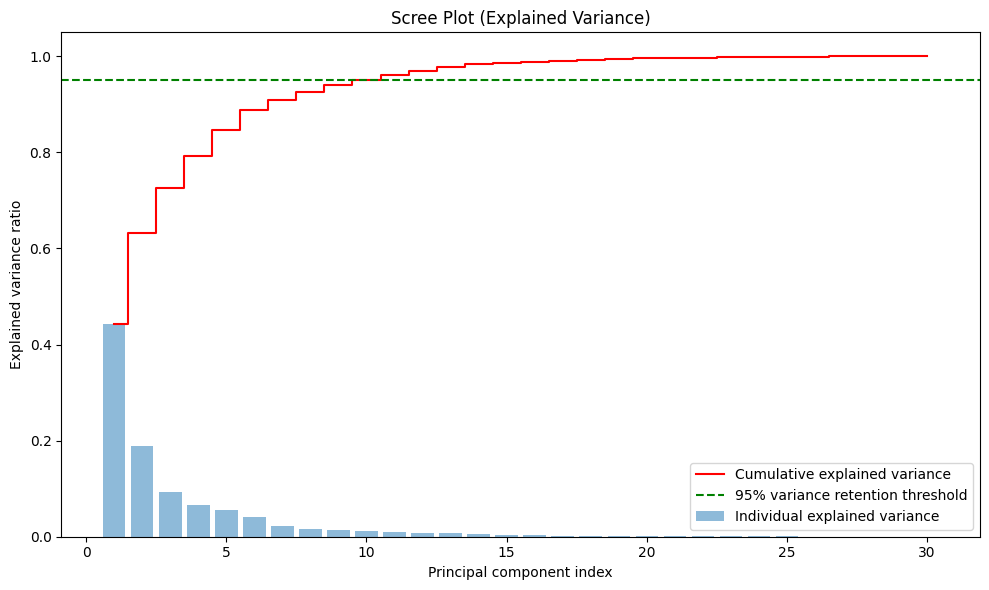

Original dimensions: (569, 30)
Reduced dimensions (95% variance): (569, 10)

Accuracy of KNN on original data: 0.9591
Accuracy of KNN on PCA-transformed data: 0.9649


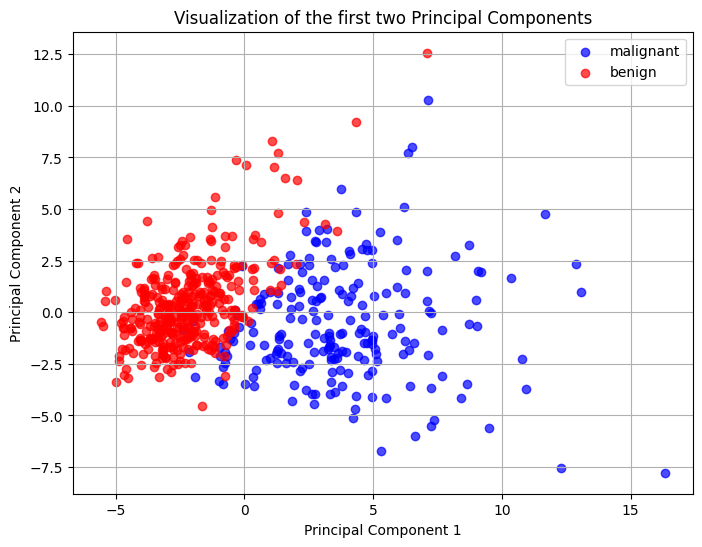

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
# 1. Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names
# Standardize the data (crucial for PCA and KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Split data for original and PCA-transformed data training (use scaled original data)
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# 2. Apply PCA and plot the scree plot
# Apply PCA with all components to analyze variance
pca_full = PCA(n_components=None)
pca_full.fit(X_scaled)
explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Plot the scree plot (explained variance ratio and cumulative variance)
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('Scree Plot (Explained Variance)')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% variance retention threshold')
plt.legend(loc='best')
plt.tight_layout()
plt.show()
# 3. Retain 95% variance and transform the dataset
# Initialize PCA with n_components=0.95 (float value retains specified variance)
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X_scaled)
print(f"Original dimensions: {X_scaled.shape}")
print(f"Reduced dimensions (95% variance): {X_pca_95.shape}")
# Split the PCA-transformed data
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca_95, y, test_size=0.3, random_state=42)
# 4. Train KNN on the original data and PCA-transformed data, then compare accuracy
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_orig, y_train)
y_pred_orig = knn_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nAccuracy of KNN on original data: {accuracy_orig:.4f}")
print(f"Accuracy of KNN on PCA-transformed data: {accuracy_pca:.4f}")
# 5. Visualize the first two principal components using a scatter plot
# We need PCA with exactly 2 components for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
# Color by class (malignant/benign)
for target_class, color in zip(np.unique(y), ['blue', 'red']):
    plt.scatter(X_pca_2d[y == target_class, 0], X_pca_2d[y == target_class, 1],
     c=color, label=target_names[target_class], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualization of the first two Principal Components')
plt.legend()
plt.grid(True)
plt.show()


9. KNN Regressor with Distance Metrics and K-Value Analysis Task: 1. Generate a synthetic regression dataset (sklearn.datasets.make_regression(n_samples=500, n_features=10)). 2. Train a KNN regressor with: a. Euclidean distance (K=5) b. Manhattan distance (K=5) c. Compare Mean Squared Error (MSE) for both. 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


MSE with Euclidean distance (K=5): 4600.79
MSE with Manhattan distance (K=5): 5425.15


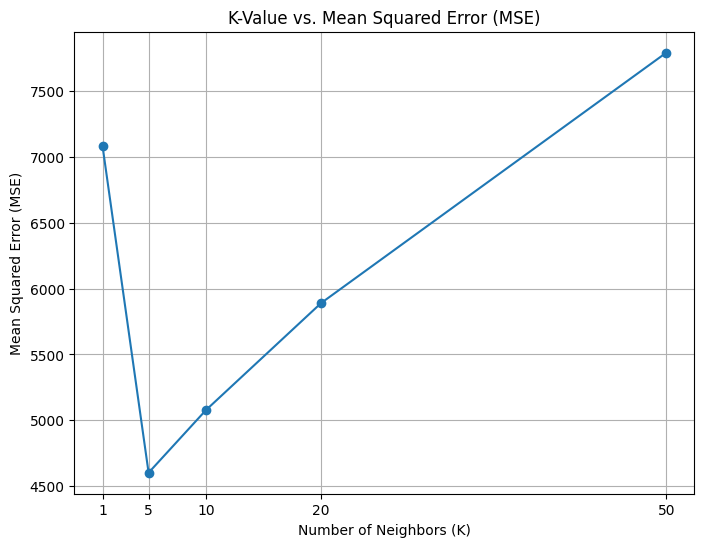


Analysis of Bias-Variance Tradeoff:
As K increases, the model becomes less sensitive to individual data points, leading to lower variance but potentially higher bias.
A small K (e.g., K=1) results in high variance and low bias, making the model prone to overfitting.
A large K (e.g., K=50) results in low variance and high bias, potentially leading to underfitting.
The optimal K value typically lies in the middle, balancing the tradeoff between bias and variance, as observed in the K vs. MSE plot.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# 1. Generate a synthetic regression dataset
X, y = make_regression(n_samples=500, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 2. Train KNN regressors with different distance metrics (K=5)
# a. Euclidean distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)
# b. Manhattan distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)
# c. Compare Mean Squared Error (MSE) for both
print(f"MSE with Euclidean distance (K=5): {mse_euclidean:.2f}")
print(f"MSE with Manhattan distance (K=5): {mse_manhattan:.2f}")
# 3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE
k_values = [1, 5, 10, 20, 50]
mse_scores = []
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
# Plot K vs. MSE
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_scores, marker='o', linestyle='-')
plt.title('K-Value vs. Mean Squared Error (MSE)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()
# Analyze bias-variance tradeoff
print("\nAnalysis of Bias-Variance Tradeoff:")
print("As K increases, the model becomes less sensitive to individual data points, leading to lower variance but potentially higher bias.")
print("A small K (e.g., K=1) results in high variance and low bias, making the model prone to overfitting.")
print("A large K (e.g., K=50) results in low variance and high bias, potentially leading to underfitting.")
print("The optimal K value typically lies in the middle, balancing the tradeoff between bias and variance, as observed in the K vs. MSE plot.")


10. KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task: 1. Load the Pima Indians Diabetes dataset (contains missing values). 2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values. 3. Train KNN using: a. Brute-force method b. KD-Tree c. Ball Tree 4. Compare their training time and accuracy. 5. Plot the decision boundary for the best-performing method (use 2 most important features).


Training with algorithm: brute
Training with algorithm: kd_tree
Training with algorithm: ball_tree

--- Comparison of KNN Algorithms ---
Method: brute, Training Time: 0.0073s, Accuracy: 0.3333
Method: kd_tree, Training Time: 0.0070s, Accuracy: 0.3333
Method: ball_tree, Training Time: 0.0072s, Accuracy: 0.3333

Best performing method: brute


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


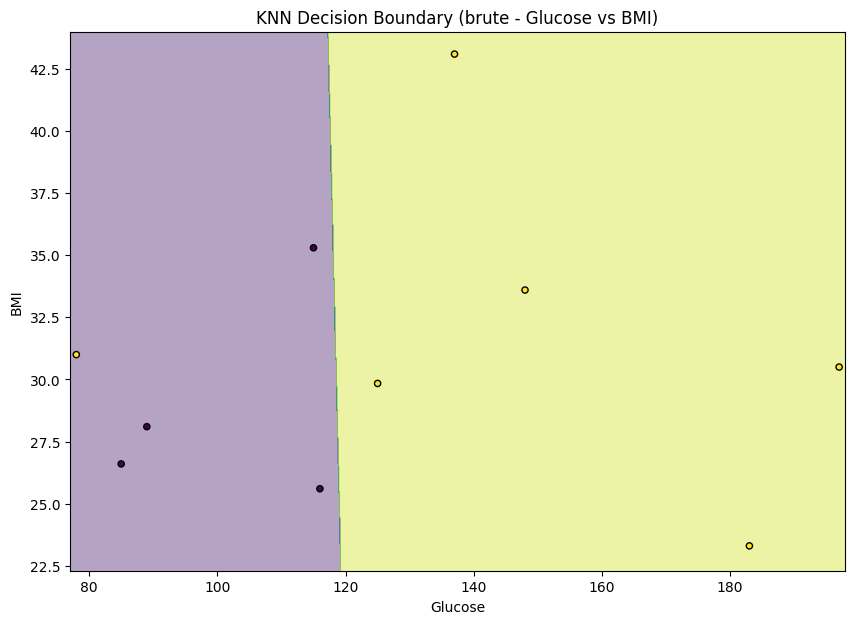

In [4]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt
import numpy as np
# 1. Load the Pima Indians Diabetes dataset
# The dataset can be loaded from various sources, here we'll simulate it or assume it's a CSV
# For demonstration, let's create a sample DataFrame with missing values
data = {
    'Pregnancies': [6, 1, 8, 1, 0, 5, 3, 10, 2, 8],
    'Glucose': [148, 85, 183, 89, 137, 116, 78, 115, 197, 125],
    'BloodPressure': [72, 66, 64, 66, 40, 74, 50, 0, 70, 96],
    'SkinThickness': [35, 29, 0, 23, 35, 0, 32, 0, 45, 0],
    'Insulin': [0, 0, 0, 94, 168, 0, 88, 0, 543, 0],
    'BMI': [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0.0],
    'DiabetesPedigreeFunction': [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158, 0.232],
    'Age': [50, 31, 32, 21, 33, 30, 26, 29, 53, 54],
    'Outcome': [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]
}
df = pd.DataFrame(data)
# Introduce some missing values (e.g., replace 0s in certain columns with NaN)
# In Pima dataset, 0s in Glucose, BloodPressure, SkinThickness, Insulin, BMI often represent missing values
cols_with_zeros_as_nan = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros_as_nan] = df[cols_with_zeros_as_nan].replace(0, np.nan)
X = df.drop('Outcome', axis=1)
y = df['Outcome']
# 2. Use KNN Imputation to fill missing values
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_df, y, test_size=0.3, random_state=42)
# 3. Train KNN using Brute-force, KD-Tree, and Ball Tree
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}
for method in methods:
    print(f"Training with algorithm: {method}")
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[method] = {'time': train_time, 'accuracy': accuracy}
# 4. Compare their training time and accuracy
print("\n--- Comparison of KNN Algorithms ---")
for method, metrics in results.items():
    print(f"Method: {method}, Training Time: {metrics['time']:.4f}s, Accuracy: {metrics['accuracy']:.4f}")
# Determine the best performing method based on accuracy (and potentially time)
best_method = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBest performing method: {best_method}")
# 5. Plot the decision boundary for the best-performing method (use 2 most important features)
# For simplicity, let's assume 'Glucose' and 'BMI' are the two most important features.
# In a real scenario, feature importance would be determined through analysis.
feature1_name = 'Glucose'
feature2_name = 'BMI'
X_plot = X_imputed_df[[feature1_name, feature2_name]]
y_plot = y
# Retrain the best model with only these two features
knn_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
knn_best.fit(X_plot, y_plot)
# Create a meshgrid to plot the decision boundary
x_min, x_max = X_plot[feature1_name].min() - 1, X_plot[feature1_name].max() + 1
y_min, y_max = X_plot[feature2_name].min() - 1, X_plot[feature2_name].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
np.arange(y_min, y_max, 0.1))
Z = knn_best.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 7))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_plot[feature1_name], X_plot[feature2_name], c=y_plot, s=20, edgecolor='k')
plt.xlabel(feature1_name)
plt.ylabel(feature2_name)
plt.title(f'KNN Decision Boundary ({best_method} - {feature1_name} vs {feature2_name})')
plt.show()
